<a href="https://colab.research.google.com/github/ishandahal/natural_language_toolkit/blob/main/nltk_writing_structured_programs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pprint, nltk, re
from nltk import word_tokenize

In [76]:
nltk.download(['punkt', 'brown', 'wordnet', 'movie_reviews'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

#### Functions: The Foundation of Structured Programming

In [3]:
def get_text(file):
    """Read text from a file, normalizing whitespace and stripping HTML markup."""
    text = open(file).read()
    text = re.sub(r"<.*?>", " ", text)
    text = re.sub('\s+', ' ', text)
    return text

In [4]:
p = []
properties = p
properties.append('noun')

#### Functional Decomposition

In [5]:
from urllib import request
from bs4 import BeautifulSoup


def freq_words(url, freqdist, n):
    html = request.urlopen(url).read().decode('utf8')
    raw = BeautifulSoup(html, 'html.parser').get_text()
    for word in word_tokenize(raw):
        freqdist[word.lower()] += 1
    result = []
    for word, count in freqdist.most_common(n):
        result = result + [word]
    print(result)

In [6]:
constitution = "http://www.archives.gov/exhibits/charters/constitution_transcript.html"
fd = nltk.FreqDist()
freq_words(constitution, fd, 30)

["''", ',', ':', ':1', ';', 'the', '(', ')', '``', '{', '}', 'of', '?', 'url', 'https', '@', 'import', 'qkh987', "'", 'archives', '#', 'and', '.', '[', ']', 'national', 'a', 'documents', 'constitution', 'founding']


Refactoring above function

In [7]:
from urllib import request
from bs4 import BeautifulSoup

def freq_words(url, n):
    html = request.urlopen(url).read().decode('utf8')
    text = BeautifulSoup(html, 'html.parser').get_text()
    freq_dist = nltk.FreqDist(word.lower() for word in word_tokenize(text))
    return [word for (word, _) in fd.most_common(n)]

In [8]:
print(freq_words(constitution, 30))

["''", ',', ':', ':1', ';', 'the', '(', ')', '``', '{', '}', 'of', '?', 'url', 'https', '@', 'import', 'qkh987', "'", 'archives', '#', 'and', '.', '[', ']', 'national', 'a', 'documents', 'constitution', 'founding']


Functions as arguments

In [9]:
sent = ['Take', 'care', 'of', 'the', 'sense', ',', 'and', 'the',
        'sounds', 'will', 'take', 'care', 'of', 'themselves', '.']
def extract_property(prop):
    return [prop(word) for word in sent]

extract_property(len)

[4, 4, 2, 3, 5, 1, 3, 3, 6, 4, 4, 4, 2, 10, 1]

In [10]:
def last_letter(word):
    return word[-1]

extract_property(last_letter)

['e', 'e', 'f', 'e', 'e', ',', 'd', 'e', 's', 'l', 'e', 'e', 'f', 's', '.']

In [11]:
# lambda function
extract_property(lambda x: x[-1])

['e', 'e', 'f', 'e', 'e', ',', 'd', 'e', 's', 'l', 'e', 'e', 'f', 's', '.']

In [12]:
print(sorted(sent))

[',', '.', 'Take', 'and', 'care', 'care', 'of', 'of', 'sense', 'sounds', 'take', 'the', 'the', 'themselves', 'will']


In [13]:
print(sorted(sent, key=lambda x: len(x)))
print(sorted(sent, key=len))

[',', '.', 'of', 'of', 'the', 'and', 'the', 'Take', 'care', 'will', 'take', 'care', 'sense', 'sounds', 'themselves']
[',', '.', 'of', 'of', 'the', 'and', 'the', 'Take', 'care', 'will', 'take', 'care', 'sense', 'sounds', 'themselves']


Accumulative Functions 

In [14]:
def search1(substring, words):
    result = []
    for word in words:
        if substring in word:
            result.append(word)
    return result

def search2(substring, words):
    for word in words:
        if substring in word:
            yield word


In [15]:
for item in search1('zz', nltk.corpus.brown.words()):
    print(item, end=' ')

Grizzlies' fizzled Rizzuto huzzahs dazzler jazz Pezza Pezza Pezza embezzling embezzlement pizza jazz Ozzie nozzle drizzly puzzle puzzle dazzling Sizzling guzzle puzzles dazzling jazz jazz Jazz jazz Jazz jazz jazz Jazz jazz jazz jazz Jazz jazz dizzy jazz Jazz puzzler jazz jazzmen jazz jazz Jazz Jazz Jazz jazz Jazz jazz jazz jazz Jazz jazz jazz jazz jazz jazz jazz jazz jazz jazz Jazz Jazz jazz jazz nozzles nozzle puzzle buzz puzzle blizzard blizzard sizzling puzzled puzzle puzzle muzzle muzzle muezzin blizzard Neo-Jazz jazz muzzle piazzas puzzles puzzles embezzle buzzed snazzy buzzes puzzled puzzled muzzle whizzing jazz Belshazzar Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie's Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie blizzard blizzards blizzard blizzard fuzzy Lazzeri Piazza piazza palazzi Piazza Piazza Palazzo Palazzo Palazzo Piazza Piazza Palazzo palazzo palazzo Palazzo Palazzo Piazza piazza piazza piazza Piazza Piazza Palazzo palazzo Piazza piazz

In [16]:
for item in search2('zz', nltk.corpus.brown.words()):
    print(item, end=' ')

Grizzlies' fizzled Rizzuto huzzahs dazzler jazz Pezza Pezza Pezza embezzling embezzlement pizza jazz Ozzie nozzle drizzly puzzle puzzle dazzling Sizzling guzzle puzzles dazzling jazz jazz Jazz jazz Jazz jazz jazz Jazz jazz jazz jazz Jazz jazz dizzy jazz Jazz puzzler jazz jazzmen jazz jazz Jazz Jazz Jazz jazz Jazz jazz jazz jazz Jazz jazz jazz jazz jazz jazz jazz jazz jazz jazz Jazz Jazz jazz jazz nozzles nozzle puzzle buzz puzzle blizzard blizzard sizzling puzzled puzzle puzzle muzzle muzzle muezzin blizzard Neo-Jazz jazz muzzle piazzas puzzles puzzles embezzle buzzed snazzy buzzes puzzled puzzled muzzle whizzing jazz Belshazzar Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie's Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie blizzard blizzards blizzard blizzard fuzzy Lazzeri Piazza piazza palazzi Piazza Piazza Palazzo Palazzo Palazzo Piazza Piazza Palazzo palazzo palazzo Palazzo Palazzo Piazza piazza piazza piazza Piazza Piazza Palazzo palazzo Piazza piazz

In [17]:
def permutation(seq):
    if len(seq) <= 1:
        yield seq
    else:
        for perm in permutation(seq[1:]):
            for i in range(len(perm)+1):
                yield perm[:i] + seq[0:1] + perm[i:]

list(permutation(['police', 'fish', 'buffalo']))

[['police', 'fish', 'buffalo'],
 ['fish', 'police', 'buffalo'],
 ['fish', 'buffalo', 'police'],
 ['police', 'buffalo', 'fish'],
 ['buffalo', 'police', 'fish'],
 ['buffalo', 'fish', 'police']]

In [18]:
def permutation(seq):
    if len(seq) <= 1:
        yield seq
    else:
        for perm in permutation(seq[1:]):
            print(perm)
            for i in range(len(perm)+1):
                yield perm[:i] + seq[0:1] + perm[i:]

list(permutation(['police', 'fish', 'buffalo']))

['buffalo']
['fish', 'buffalo']
['buffalo', 'fish']


[['police', 'fish', 'buffalo'],
 ['fish', 'police', 'buffalo'],
 ['fish', 'buffalo', 'police'],
 ['police', 'buffalo', 'fish'],
 ['buffalo', 'police', 'fish'],
 ['buffalo', 'fish', 'police']]

Higher Order Function

In [19]:
def is_content_word(word):
    return word.lower() not in ['a', 'of', 'the', 'and', 'will', ',', '.']

sent = ['Take', 'care', 'of', 'the', 'sense', ',', 'and', 'the',
        'sounds', 'will', 'take', 'care', 'of', 'themselves', '.']

list(filter(is_content_word, sent))

['Take', 'care', 'sense', 'sounds', 'take', 'care', 'themselves']

In [20]:
[word for word in sent if is_content_word(word)]

['Take', 'care', 'sense', 'sounds', 'take', 'care', 'themselves']

In [21]:
lengths = list(map(len, nltk.corpus.brown.sents(categories='news')))
sum(lengths) / len(lengths)

21.75081116158339

In [22]:
lengths = [len(sent) for sent in nltk.corpus.brown.sents(categories='news')]
sum(lengths) / len(lengths)

21.75081116158339

In [23]:
song = [['four', 'calling', 'birds'],
        ['three', 'French', 'hens'],
        ['two', 'turtle', 'doves']]

In [24]:
list(zip(song[0], song[1], song[2]))

[('four', 'three', 'two'),
 ('calling', 'French', 'turtle'),
 ('birds', 'hens', 'doves')]

In [25]:
list(zip(*song))

[('four', 'three', 'two'),
 ('calling', 'French', 'turtle'),
 ('birds', 'hens', 'doves')]

In [ ]:
def freq_words(file, min=1, num=10):
    text = open(file).read()
    tokens = word_tokenize(text)
    freqdist = nltk.FreqDist(t for t in tokens if len(t) >= min)
    return freqdist.most_common(num)
fw = freq_words('ch01.rst', 4, 10)
fw = freq_words('ch01.rst', min=4, num=10)
fw = freq_words('ch01.rst', num=10, min=4)

Verbose implementation

In [ ]:
def freq_words(file, min=1, num=10, verbose=False):
    freqdist = FreqDist()
    if verbose: print('Opening', file)
    text = open(file).read()
    if verbose: print(f'Read in {len(file)}')
    for word in word_tokenize(text):
        if len(word) >= min:
            freqdist[word] += 1
            if verbose and freqdist.N() % 100 == 0: print(".", sep='')
    if verbose: print
    return freqdist.most_common(num)

In [46]:
def find_words(text, wordlength, result=[]):
    for word in text:
        if len(word) == wordlength:
            result.append(word)
    return result

In [31]:
find_words(['omg', 'teh', 'lolcat', 'sitted', 'on', 'teh', 'mat'], 3)

['omg', 'teh', 'teh', 'mat']

In [32]:
find_words(['omg', 'teh', 'lolcat', 'sitted', 'on', 'teh', 'mat'], 2, ['url'])

['url', 'on']

In [44]:
print(find_words(['omg', 'teh', 'lolcat', 'sitted', 'on', 'teh', 'mat'], 3))

['omg', 'teh', 'teh', 'mat', 'omg', 'teh', 'teh', 'mat', 'on', 'omg', 'teh', 'teh', 'mat', 'omg', 'teh', 'teh', 'mat', 'omg', 'teh', 'teh', 'mat', 'omg', 'teh', 'teh', 'mat', 'on', 'omg', 'teh', 'teh', 'mat', 'omg', 'teh', 'teh', 'mat']


In [47]:
import pdb

find_words(['cat'], 3)

['cat']

In [48]:
pdb.run("find_words(['dog'], 3)")

> <string>(1)<module>()
(Pdb) s
--Call--
> <ipython-input-46-4465ec416688>(1)find_words()
-> def find_words(text, wordlength, result=[]):
(Pdb) args
text = ['dog']
wordlength = 3
result = ['cat']
(Pdb) c


### Recursion

In [49]:
def factorial1(n):
    result = 1
    for i in range(n):
        result *= (i + 1)
    return result

In [50]:
def factorial2(n):
    """ Recrusive factorial"""
    if n == 1:
        return 1
    else:
        return n * factorial2(n - 1)

In [51]:
factorial1(10) == factorial2(10)

True

In [58]:
def size1(s):
    return 1 + sum(size1(child) for child in s.hyponyms())

In [53]:
def size2(s):
    layer = [s]
    total = 0
    while layer:
        total += len(layer)
        layer = [h for c in layer for h in c.hyponyms()]
    return total

In [60]:
from nltk.corpus import wordnet as wn
dog = wn.synset('dog.n.01')
print(size1(dog))
print(size2(dog))

190
190


In [61]:
def insert(trie, key, value):
    if key:
        first, rest = key[0], key[1:]
        if first not in trie:
            trie[first] = {}
        insert(trie[first], rest, value)
    else:
        trie['value'] = value

In [64]:
trie = {}
insert(trie, 'chat', 'cat')

In [65]:
trie

{'c': {'h': {'a': {'t': {'value': 'cat'}}}}}

In [68]:
insert(trie, 'chic', 'stylish')
pprint.pprint(trie, width=40)

{'c': {'h': {'a': {'t': {'value': 'cat'}},
             'i': {'c': {'value': 'stylish'}}}}}


In [74]:
trie['c']['h']['i']['c']['value']

'stylish'

- Space-Time Tradeoffs

In [79]:
def raw(file):
    contents = open(file).read()
    contents = re.sub(r'<.*?>', ' ', contents)
    contents = re.sub('\s+', ' ', contents)
    return contents

def snippet(doc, term):
    text = ' '*30 + raw(doc) + ' '*30
    pos = text.index(term)
    return text[pos-30:pos+30]

print("Building Index...")
files = nltk.corpus.movie_reviews.abspaths()
idx = nltk.Index((w, f) for f in files for w in raw(f).split())

query = ''
while query != "quit":
    query = input("query> ")     # use raw_input() in Python 2
    if query in idx:
        for doc in idx[query]:
            print(snippet(doc, query))
    else:
        print("Not found")

Building Index...
query> quit
s funded by her mother . lucy quit working professionally 10
erick . i disliked that movie quite a bit , but since " prac
t disaster . babe ruth didn't quit baseball after one season
o-be fiance . i think she can quit that job and get a more r
 and rose mcgowan should just quit acting . she has no chari
and get a day job . and don't quit it .                     
 kubrick , alas , should have quit while he was ahead . this
everyone involved should have quit while they were still ahe
l die . so what does joe do ? quit his job , of course ! ! w
red " implant . he's ready to quit the biz and get a portion
hat he always recorded , they quit and become disillusioned 
 admit that i ? ? ? ve become quite the " scream " fan . no 
 again , the fact that he has quit his job to feel what it's
school reunion . he has since quit his job as a travel journ
ells one of his friends , " i quit school because i didn't l
ms , cursing off the boss and quitting his job ( " toda

In [80]:
def preprocess(tagged_corpus):
    words = set()
    tags = set()
    for sent in tagged_corpus:
        for word, tag in sent:
            words.add(word)
            tags.add(tag)
    wm = dict((w, i) for (i, w) in enumerate(words))
    tm = dict((t, i) for (i, t) in enumerate(tags))
    return [[(wm[w], tm[t]) for (w, t) in sent] for sent in tagged_corpus]

In [85]:
from timeit import Timer
vocab_size = 100000
setup_list = f'import random; vocab = range({vocab_size})'
setup_set = f"import random; vocab = set(range({vocab_size}))"
statement = f"random.randint(0, {vocab_size * 2})"
print(Timer(statement, setup_list).timeit(1000))
print(Timer(statement, setup_set).timeit(1000))

0.001289764999455656
0.0014627709988417337


In [84]:
from timeit import Timer
vocab_size = 100000
setup_list = "import random; vocab = range(%d)" % vocab_size
setup_set = "import random; vocab = set(range(%d))" % vocab_size
statement = "random.randint(0, %d) in vocab" % (vocab_size * 2)
print(Timer(statement, setup_list).timeit(1000))
print(Timer(statement, setup_set).timeit(1000))

0.0019541030014806893
0.0015169179987424286


#### MatPlotLib

In [86]:
from numpy import arange
from matplotlib import pyplot

colors = 'rgbcmyk' # red, green, blue, cyan, magenta, yellow, black

def bar_chart(categories, words, counts):
    "Plot a bar chart showing counts for each word by category"
    ind = arange(len(words))
    width = 1 / (len(categories) + 1)
    bar_groups = []
    for c in range(len(categories)):
        bars = pyplot.bar(ind+c*width, counts[categories[c]], width,
                         color=colors[c % len(colors)])
        bar_groups.append(bars)
    pyplot.xticks(ind+width, words)
    pyplot.legend([b[0] for b in bar_groups], categories, loc='upper left')
    pyplot.ylabel('Frequency')
    pyplot.title('Frequency of Six Modal Verbs by Genre')
    pyplot.show()

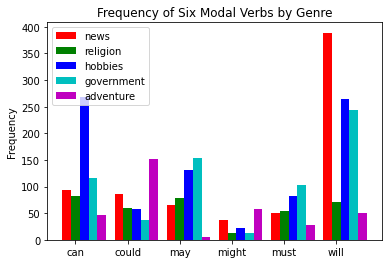

In [87]:
genres = ['news', 'religion', 'hobbies', 'government', 'adventure']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfdist = nltk.ConditionalFreqDist(
             (genre, word)
             for genre in genres
             for word in nltk.corpus.brown.words(categories=genre)
             if word in modals)
counts = {}
for genre in genres:
    counts[genre] = [cfdist[genre][word] for word in modals]
bar_chart(genres, modals, counts)

In [88]:
from matplotlib import use, pyplot
use('Agg')
pyplot.savefig('modals.png')
print("Content-Type: text/html")
print()
print('<html><body>')
print("<img src='modals.png'/>")
print("</body></html>")

Content-Type: text/html

<html><body>
<img src='modals.png'/>
</body></html>


<Figure size 432x288 with 0 Axes>

In [100]:
import networkx as nx
import matplotlib
from nltk.corpus import wordnet as wn

def traverse(graph, start, node):
    graph.depth[node.name] = node.shortest_path_distance(start)
    for child in node.hyponyms():
        graph.add_edge(node.name, child.name)
        traverse(graph, start, child)

def hyponym_graph(start):
    G = nx.Graph()
    G.depth = {}
    traverse(G, start, start)
    return G

def graph_draw(graph):
    nx.draw_networkx(graph,
         node_size = [16 * graph.degree(n) for n in graph],
         node_color = [graph.depth[n] for n in graph],
         with_labels = False)
    matplotlib.pyplot.show()

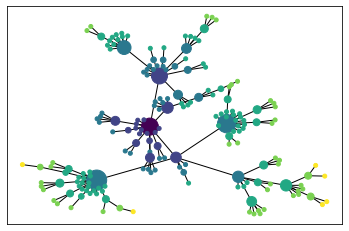

In [103]:
dog = wn.synset('dog.n.01')
graph = hyponym_graph(dog)
graph_draw(graph)

In [104]:
import sys
sys.version

'3.6.9 (default, Oct  8 2020, 12:12:24) \n[GCC 8.4.0]'